# Finding and drawing Contours

Contours are outlines of structures in an image. Edges define the region of gradient change in the image and also gives us the outlines. But to access each object in an image we need contours. 

Although grayscale images can be used to extract the contours, converting them to a binary image improves the accuracy

The cv2.findContours function can be used to extract all the contours in an image. The function takes three arguments

1. ### Source image - 

    Since this method modifies the source image , if the original image is needed even after extraction of contours, a copy of the source image should be used (src = image.copy())

2. ### Contour retreval mode - 

    CV_RETR_EXTERNAL retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.
    
    CV_RETR_LIST retrieves all of the contours without establishing any hierarchical relationships.
    
    CV_RETR_CCOMP retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.
    
    CV_RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours. This full hierarchy is built and shown in the OpenCV contours.c demo.
    
3. ### Contour approximation - 
    
    CV_CHAIN_APPROX_NONE stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.
    
    CV_CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.
    
    CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS applies one of the flavors of the Teh-Chin chain approximation algorithm. 
    
This function returns a three output tupel. 

1. One : the output image
2. Contour list
3. Contour hierarchy

The function works as shown below

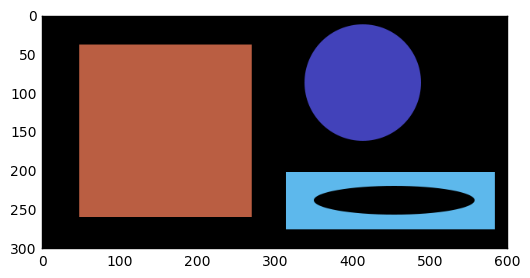

In [10]:
import cvutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import numpy as np

image = cv2.imread('image/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#blr = cv2.GaussianBlur(image,(5,5),0)
plt.imshow(image,cmap='gray')
plt.show()

To obtain all the contours in this image. **Draw Contours** function can be used to loop through all the images and plot the one desired. The arguments to this function is as below

    image – Destination image.
    contours – All the input contours. Each contour is stored as a point vector.
    contourIdx – Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    color – Color of the contours.
    thickness – Thickness of lines the contours are drawn with. If it is negative (for example, thickness=CV_FILLED ), the contour interiors are drawn.
    lineType – Line connectivity. See line() for details.
    hierarchy – Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
    maxLevel – Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.
    offset – Optional contour shift parameter. Shift all the drawn contours by the specified  \texttt{offset}=(dx,dy) .
    contour – Pointer to the first contour.
    external_color – Color of external contours.
    hole_color – Color of internal contours (holes).

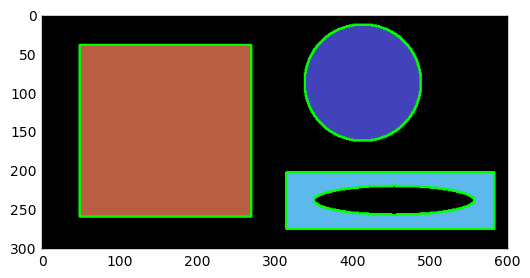

In [25]:
cnts = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
clone = image.copy()
cv2.drawContours(clone,cnts[1],-1,(0,255,0),2)

plt.imshow(clone)
plt.show()


In [26]:
print(cv2.__version__)

3.4.1


## Accessing one contour at a time

***Since I'm using OpenCV 3 the list of contours is the second element of the returned tuple from findCountors and hence cnts[1] is passed to drawContours***

findContours returns all the contours which allows us to loop over them and select the one we want to draw. Setting the third argument **countorIdx** to -1 will draw all the contours. Alternatively we can also draw the desired contour referencing the desired id.

Drawing contour #1


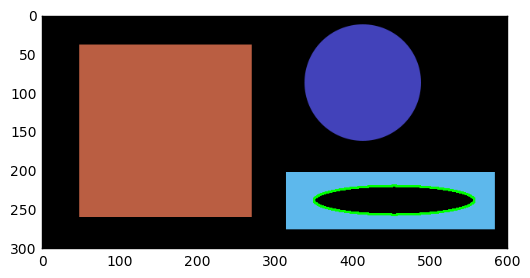

Drawing contour #2


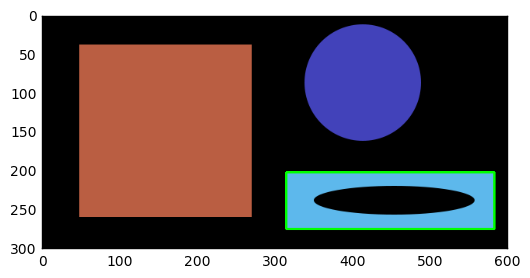

Drawing contour #3


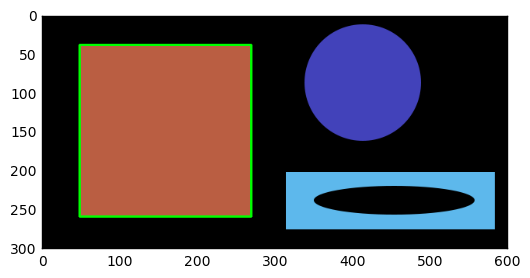

Drawing contour #4


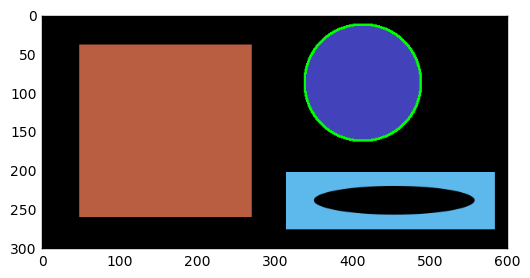

In [55]:

for i,c in enumerate(cnts[1]):
    clone = image.copy()
    cv2.drawContours(clone,cnts[1],i,(0,255,0),2)
    print("Drawing contour #{}".format((i+1)))
    plt.imshow(clone)
    plt.show()

## Masking using contours

Finally if we want to use one of the contours as a mask we can draw it on a black background and fill it with white.This can be used as a mask by calling bitwise and on the image as shown bellow.

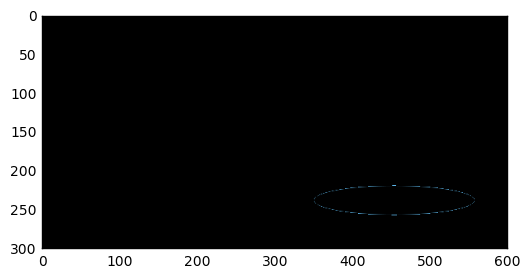

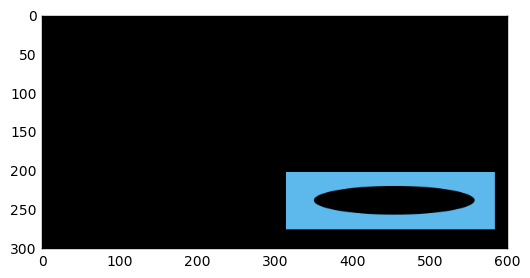

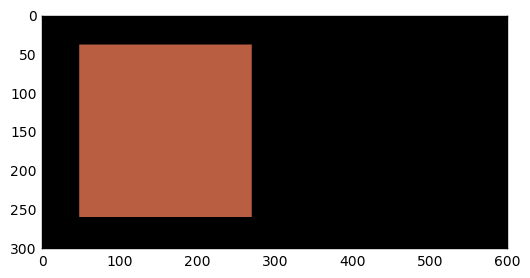

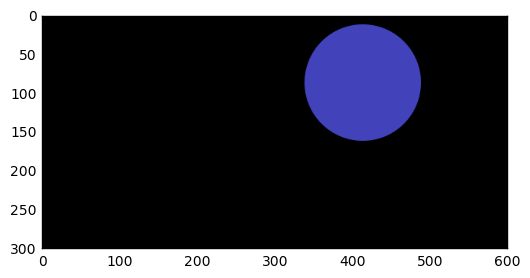

In [56]:

for i,c in enumerate(cnts[1]):
    mask = np.zeros(gray.shape, dtype = 'uint8')
    cv2.drawContours(mask,[c],-1,(225,255,225),-1)
    masked_img = cv2.bitwise_and(image,image,mask=mask)
    plt.imshow(masked_img)
    plt.show()
    